In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')




In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Check information of Dataset

In [5]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
dataset.duplicated().sum()

0

# Pre-Prunning

In [8]:
dataset = dataset.iloc[:,3:]
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Encoding

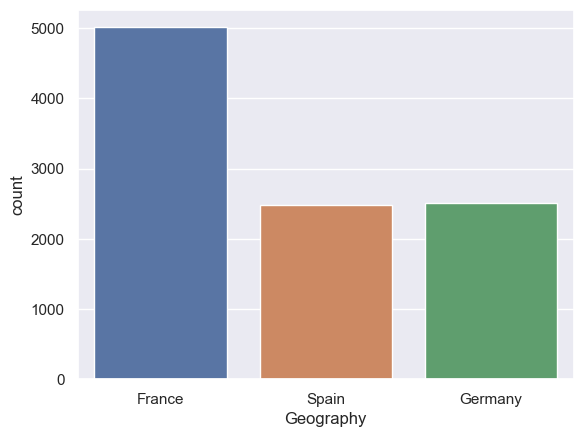

In [9]:
sns.countplot(x = dataset["Geography"])
plt.show()

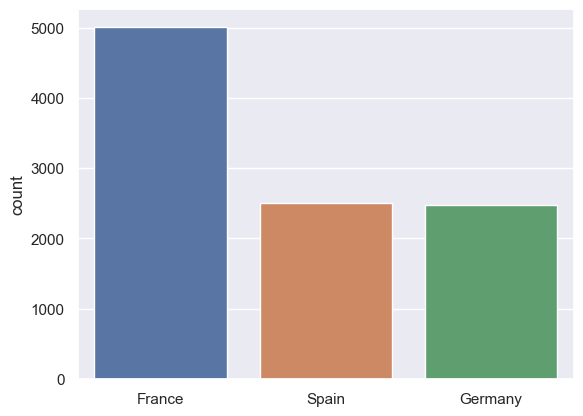

In [19]:
sns.barplot(x=dataset["Geography"].unique() , y = dataset["Geography"].value_counts())
plt.show()

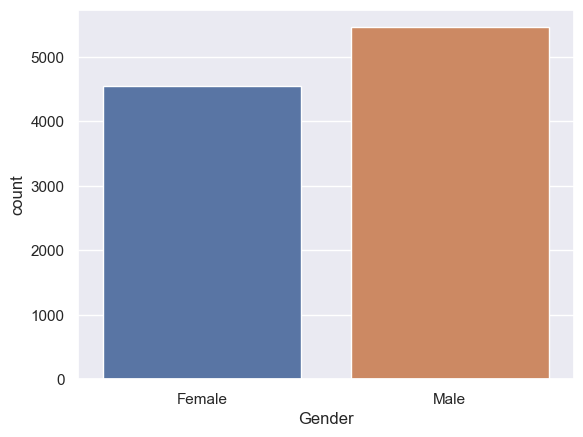

In [10]:
sns.countplot(x = dataset["Gender"])
plt.show()

In [13]:
dataset["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

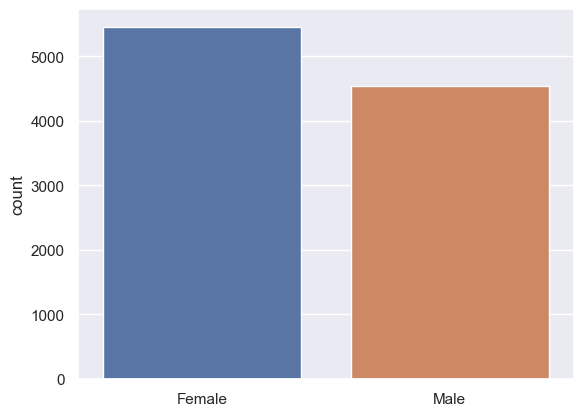

In [18]:
sns.barplot(x=dataset["Gender"].unique() , y = dataset["Gender"].value_counts())
plt.show()

In [11]:
dataset = pd.get_dummies(dataset,  columns = ["Geography"] , drop_first= True , dtype=int)

In [12]:
dataset.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,1


In [13]:
dataset = pd.get_dummies(dataset , columns = ["Gender"] , drop_first=True , dtype=int)

In [14]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


<Axes: >

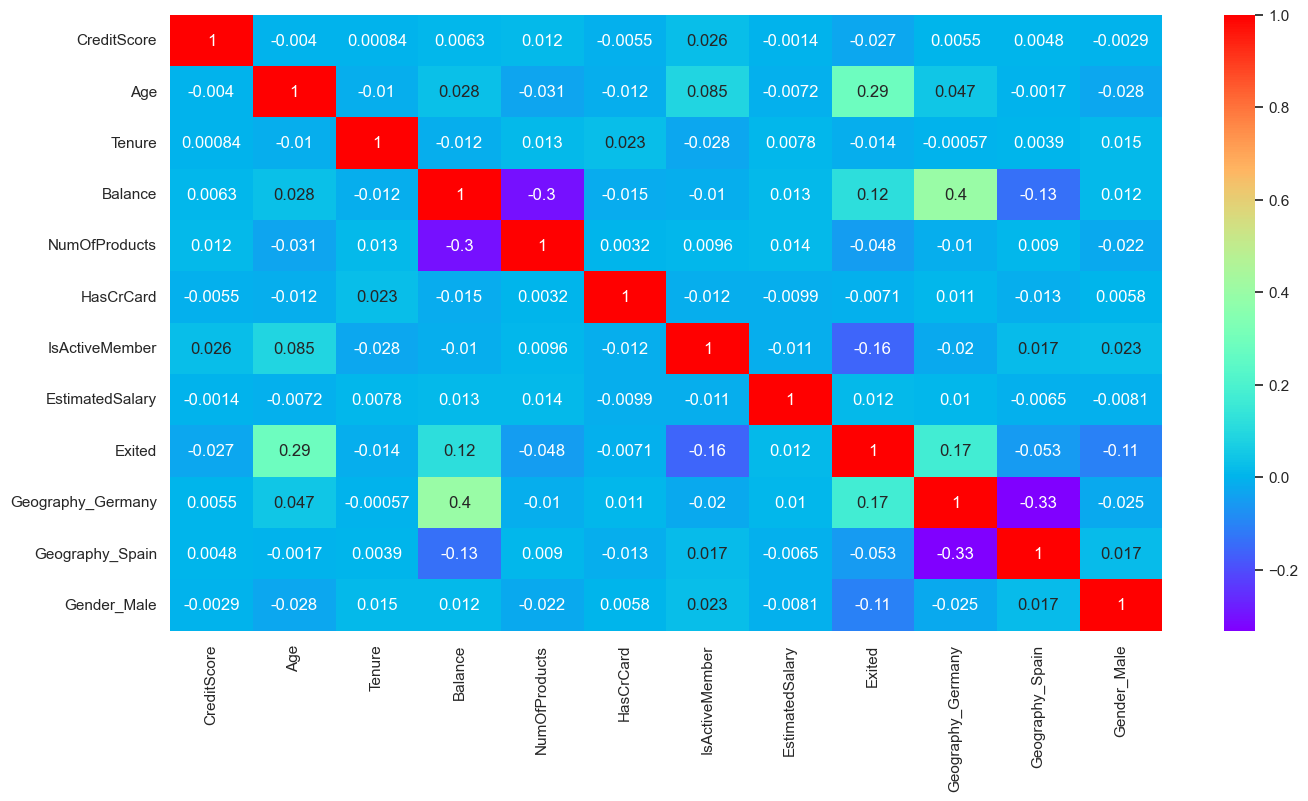

In [15]:
plt.figure(figsize=(16,8))
sns.heatmap(dataset.corr() , annot = True , cmap='rainbow')

In [16]:
import dtale
dtale.show(dataset)

In [17]:
x =  dataset.drop(['Exited'] , axis = 1)
y = dataset['Exited']

In [18]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

Imbalance Treatmeant required however we use stratify to balance training and test dataset

In [19]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote , y_smote = smote.fit_resample(x,y)

print(y.value_counts())
print(y_smote.value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64
Exited
1    7963
0    7963
Name: count, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x_smote ,y_smote , test_size= 0.2 , random_state= 33 , stratify= y_smote )

In [21]:
# data Leakage Problem - 
## 1) if we jave train and test data separately, we jave to handle missing data, feature scaling, outlier treatment separetly

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<Axes: xlabel='Exited'>

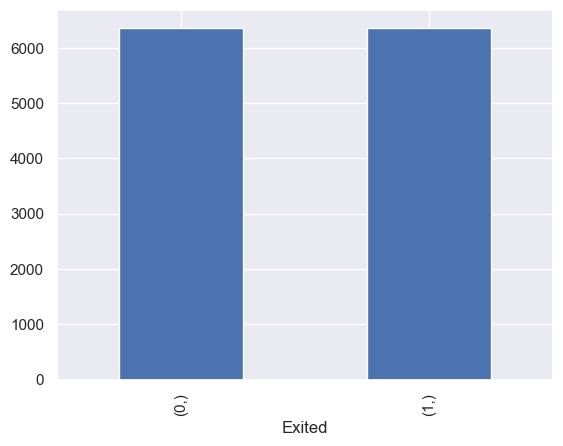

In [22]:
pd.DataFrame(y_train).value_counts().plot(kind = 'bar')

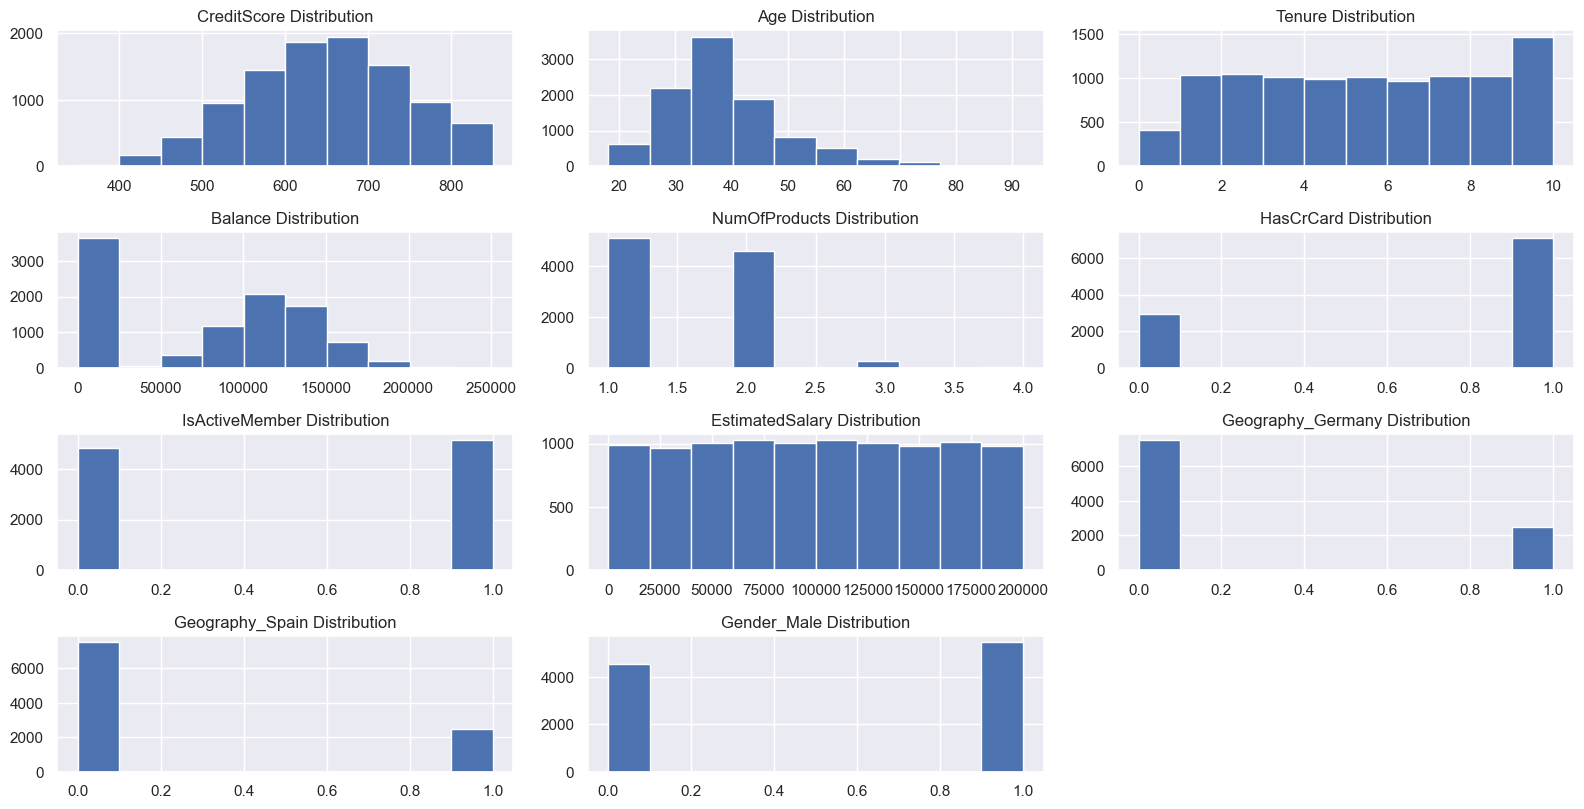

In [23]:
def draw_histogram(dataset , varibale , n_rows , n_cols):
    fig = plt.figure(figsize=(16, 10))
    for i, var_name in enumerate(varibale):
        ax = fig.add_subplot(n_rows , n_cols , i+1)
        dataset[var_name].hist(bins=10 , ax = ax)
        ax.set_title(var_name + " Distribution")
    fig.tight_layout()
    plt.show()
    
draw_histogram(dataset , x , 5 , 3)

# Model Building 

Model 1: ADABoost

Boosting is for handling high bias problem and bagging for high variance problem 

In [24]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train , y_train )

AdaBoostClassifier()

In [25]:
y_predict_train_ada = ada.predict(x_train)
y_predict_test_ada = ada.predict(x_test)

In [26]:
from sklearn import metrics

print(metrics.classification_report(y_train , y_predict_train_ada))
print()
print(metrics.classification_report(y_test , y_predict_test_ada))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      6370
           1       0.82      0.83      0.83      6370

    accuracy                           0.83     12740
   macro avg       0.83      0.83      0.83     12740
weighted avg       0.83      0.83      0.83     12740


              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1593
           1       0.82      0.82      0.82      1593

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186



In [27]:

print(metrics.accuracy_score(y_train , y_predict_train_ada))
print()
print(metrics.accuracy_score(y_test , y_predict_test_ada))

0.8267660910518053

0.8220338983050848


Model 2: Gradient Boosting Algorithm

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train , y_train)

GradientBoostingClassifier()

In [29]:
y_predict_train_gbc = gbc.predict(x_train)
y_predict_test_gbc = gbc.predict(x_test)

In [30]:
print(metrics.classification_report(y_train , y_predict_train_gbc))
print()
print(metrics.classification_report(y_test , y_predict_test_gbc))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      6370
           1       0.85      0.84      0.85      6370

    accuracy                           0.85     12740
   macro avg       0.85      0.85      0.85     12740
weighted avg       0.85      0.85      0.85     12740


              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1593
           1       0.85      0.82      0.83      1593

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



In [31]:

print(metrics.accuracy_score(y_train , y_predict_train_gbc))
print()
print(metrics.accuracy_score(y_test , y_predict_test_gbc))

0.8461538461538461

0.8367859384808537


Model 3: XGBoostClassificer

In [32]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train , y_train )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
y_predict_train_xgb = xgb.predict(x_train)
y_predict_test_xgb = xgb.predict(x_test)

In [34]:
print(metrics.classification_report(y_train , y_predict_train_xgb))
print()
print(metrics.classification_report(y_test , y_predict_test_xgb))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      6370
           1       0.94      0.95      0.95      6370

    accuracy                           0.95     12740
   macro avg       0.95      0.95      0.95     12740
weighted avg       0.95      0.95      0.95     12740


              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1593
           1       0.86      0.84      0.85      1593

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



In [35]:

print(metrics.accuracy_score(y_train , y_predict_train_xgb))
print()
print(metrics.accuracy_score(y_test , y_predict_test_xgb))

0.9452904238618525

0.8499686126804771


In [36]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(xgb , x_train , y_train , cv =10)
print(training_accuracy)
print(training_accuracy.mean())
print(training_accuracy.max())

[0.8610675  0.85086342 0.83437991 0.84929356 0.85086342 0.86342229
 0.87519623 0.85007849 0.86028257 0.85086342]
0.8546310832025117
0.8751962323390895


Model 4:Bagging Classifier

In [37]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
bagging.fit(x_train , y_train )

BaggingClassifier()

In [38]:
y_predict_train_bagging = bagging.predict(x_train)
y_predict_test_bagging = bagging.predict(x_test)

In [39]:

print(metrics.accuracy_score(y_train , y_predict_train_bagging))
print()
print(metrics.accuracy_score(y_test , y_predict_test_bagging))

0.9888540031397174

0.8236032642812304


Model 5: RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train , y_train )

RandomForestClassifier()

In [41]:
y_predict_train_rfc = rfc.predict(x_train)
y_predict_test_rfc = rfc.predict(x_test)

In [42]:
print(metrics.accuracy_score(y_train , y_predict_train_rfc))
print()
print(metrics.accuracy_score(y_test , y_predict_test_rfc))

1.0

0.8587570621468926


Model 6: KNN(K-Nearest Neighbors)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train , y_train )

KNeighborsClassifier()

In [44]:
error_rate = []

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train , y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred != y_test))

In [45]:
error_rate

[0.18863779033270558,
 0.19397363465160075,
 0.17922159447583177,
 0.18204645323289392,
 0.1785938480853735,
 0.18267419962335216,
 0.17639673571876963,
 0.1785938480853735,
 0.1760828625235405,
 0.18110483364720653,
 0.177338355304457,
 0.1829880728185813,
 0.17953546767106088,
 0.18581293157564344]

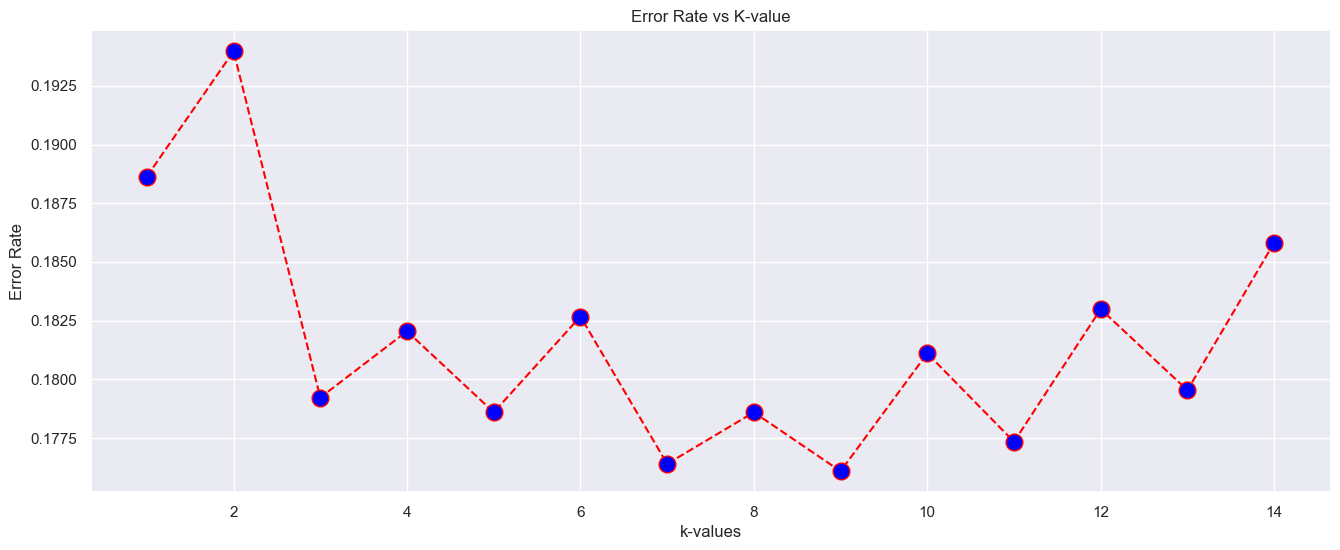

In [46]:
plt.figure(figsize=(16,6))
plt.plot(range(1,15) , error_rate , color = 'red' ,linestyle = 'dashed' , marker = 'o' , markersize = 12 , markerfacecolor = 'blue')

plt.title("Error Rate vs K-value")
plt.xlabel('k-values')
plt.ylabel('Error Rate')
plt.show()

In [47]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train , y_train )

KNeighborsClassifier()

In [48]:
y_predict_train_knn= knn.predict(x_train)
y_predict_test_knn = knn.predict(x_test)

In [49]:
print(metrics.accuracy_score(y_train , y_predict_train_knn))
print()
print(metrics.accuracy_score(y_test , y_predict_test_knn))

0.8694662480376766

0.8214061519146265


# Voting classifier

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [51]:
c1 = LogisticRegression()
c2 = DecisionTreeClassifier()
c3 = RandomForestClassifier()
c4 = AdaBoostClassifier()
c5 = KNeighborsClassifier()
c6 = BaggingClassifier()
c7 = GradientBoostingClassifier()
c8 = XGBClassifier()

In [52]:
estimators = [('lr', c1) ,('Dtc' , c2) , ('rfc' , c3) ,('Ada' , c4 ) , ('Knn' , c5),
             ('bagging' , c6) , ('gr' , c7) , ('xg' , c8) ]

In [61]:
for estimator in estimators:
    x = cross_val_score(estimator[1] , x_smote , y_smote , cv = 10 , scoring='accuracy')
    print(estimator[0] , np.round(np.mean(x) , 2))

lr 0.69
Dtc 0.79
rfc 0.86
Ada 0.82
Knn 0.69
bagging 0.84
gr 0.83
xg 0.86


In [62]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators)

vc_cross_val = cross_val_score(vc , x_smote , y_smote ,cv = 10,  scoring='accuracy')

print(vc_cross_val)
print()
print(vc_cross_val.mean())
print()
print(vc_cross_val.max())

[0.77338355 0.77966102 0.82297552 0.88323917 0.88575016 0.89893283
 0.87688442 0.90075377 0.89949749 0.8611809 ]

0.8582258830246652

0.9007537688442211


# Stacking 

In [63]:
from sklearn.ensemble import StackingClassifier

sc = StackingClassifier(estimators , final_estimator=c1)


vc_cross_val1 = cross_val_score(vc , x_smote , y_smote ,cv = 10,  scoring='accuracy')

print(vc_cross_val1)
print()
print(vc_cross_val1.mean())
print()
print(vc_cross_val1.max())

[0.77338355 0.77463905 0.82297552 0.88386692 0.88198368 0.90207156
 0.87562814 0.90012563 0.89635678 0.86871859]

0.8579749421937054

0.9020715630885122


2024-07-05 08:25:33,301 - INFO     - Executing shutdown due to inactivity...
2024-07-05 08:25:37,434 - INFO     - Executing shutdown...
2024-07-05 08:25:37,439 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer
